## Multiple Support Excitation and System Identification

### Chopra Section 9.7

![structure_diagram](images/structure_diagram.png)

### Partitioned equation of dynamic equilibrium (Chopra Eq. 9.7.1)

$$
\begin{bmatrix}
\mathbf{m} & \mathbf{m}_g \\
\mathbf{m}^T_g & \mathbf{m}_{gg}
\end{bmatrix}
\begin{Bmatrix}
\mathbf{\ddot{u}}^t \\
\mathbf{\ddot{u}}_g
\end{Bmatrix}
+
\begin{bmatrix}
\mathbf{c} & \mathbf{c}_g \\
\mathbf{c}^T_g & \mathbf{c}_{gg}
\end{bmatrix}
\begin{Bmatrix}
\mathbf{\dot{u}}^t \\
\mathbf{\dot{u}}_g
\end{Bmatrix}
+
\begin{bmatrix}
\mathbf{k} & \mathbf{k}_g \\
\mathbf{k}^T_g & \mathbf{k}_{gg}
\end{bmatrix}
\begin{Bmatrix}
\mathbf{u}^t \\
\mathbf{u}_g
\end{Bmatrix}
=
\begin{Bmatrix}
\mathbf{0} \\
\mathbf{p}_g(t)
\end{Bmatrix}
$$

### Problem Statement

given: $\mathbf{u}_g$, $\mathbf{\dot{u}}_g$, and $\mathbf{\ddot{u}}_g$

find: $\mathbf{u}^t$ and $\mathbf{p}_g(t)$

--> (system ID: given output $\mathbf{u}^t$ and input $\mathbf{\ddot{u}}_g$, determine fundamental frequencies and mode shapes of the structure.)

### General equation of motion for multiple support excitation

1. split displacements into quasi-static ($\mathbf{u}^s$) and dynamic ($\mathbf{u}$) displacements (chopra eq 9.7.2):

$$
\begin{Bmatrix}
\mathbf{u}^t \\
\mathbf{u}_g
\end{Bmatrix}
=
\begin{Bmatrix}
\mathbf{u}^s \\
\mathbf{u}_g
\end{Bmatrix}
+
\begin{Bmatrix}
\mathbf{u} \\
\mathbf{0}
\end{Bmatrix}
$$

2. take the first half of the partitioned equilibrium equation from eq 9.7.1 (chopra eq 9.7.4)

$$
\mathbf{m}\mathbf{\ddot{u}}^t + \mathbf{m}_g\mathbf{\ddot{u}}_g
+
\mathbf{c}\mathbf{\dot{u}}^t + \mathbf{c}_g\mathbf{\dot{u}}_g
+
\mathbf{k}\mathbf{u}^t + \mathbf{k}_g\mathbf{u}_g
=
\mathbf{0}
$$

3. substitute eq 9.7.2 ($\mathbf{u}^t=\mathbf{u}^s+\mathbf{u}$) and move all $\mathbf{u}_g$ and $\mathbf{u}^s$ terms to the right side (chopra eq 9.7.5):
$$
\mathbf{m}\mathbf{\ddot{u}} + \mathbf{c}\mathbf{\dot{u}} + \mathbf{k}\mathbf{u}
= \mathbf{p}_{eff}(t)
$$
where
$$
\mathbf{p}_{eff}(t) =
-(\mathbf{m}\mathbf{\ddot{u}}^s+\mathbf{m}_g\mathbf{\ddot{u}}_g)
-(\mathbf{c}\mathbf{\dot{u}}^s+\mathbf{c}_g\mathbf{\dot{u}}_g)
-(\mathbf{k}\mathbf{u}^s+\mathbf{k}_g\mathbf{u}_g)
$$
which simplifies to
$$
\mathbf{p}_{eff}(t) =
-\mathbf{m}\mathbf{\iota}\mathbf{\ddot{u}}_g(t)
$$

4. final equation of motion
$$
\mathbf{m}\mathbf{\ddot{u}} + \mathbf{c}\mathbf{\dot{u}} + \mathbf{k}\mathbf{u}
= -\mathbf{m}\mathbf{\iota}\mathbf{\ddot{u}}_g(t)
$$


### Example 9.10

![structure_diagram](images/ex9.10.png)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# EI/L^3 = 1
EIL3 = 1
# m = 1
m_node = 1

k_hat = EIL3*np.array(
    [
        [78.86, 30.86, -29.14, -75.43, -5.14],
        [30.86, 78.86, -5.13, -75.43, -29.14],
        [-29.14, -5.14, 12.86, 20.57, 0.86],
        [-75.43, -75.43, 20.57, 109.71, 20.57],
        [-5.14, -29.14, 0.86, 20.57, 12.86]
    ]
)

k = k_hat[:2,:2]
k_g = k_hat[:2,2:]
k_gg = k_hat[2:,2:]

print(f"{k=}, \n{k_g=}, \n{k_gg=}")

m = m_node*np.identity(2)

print(f"{m=}")

iota = -np.linalg.inv(k)@k_g

print(f"{iota=}")

k=array([[78.86, 30.86],
       [30.86, 78.86]]), 
k_g=array([[-29.14, -75.43,  -5.14],
       [ -5.13, -75.43, -29.14]]), 
k_gg=array([[ 12.86,  20.57,   0.86],
       [ 20.57, 109.71,  20.57],
       [  0.86,  20.57,  12.86]])
m=array([[1., 0.],
       [0., 1.]])
iota=array([[ 0.40627442,  0.68747721, -0.09378418],
       [-0.09393392,  0.68747721,  0.40621582]])


### Equation of motion for chopra example 9.10

$$
\mathbf{m}\mathbf{\ddot{u}} + \mathbf{k}\mathbf{u}
= -\sum_{l=1}^{3}\mathbf{m}\mathbf{\iota}_l\mathbf{\ddot{u}}_{gl}(t)
$$
where
$$
m = m\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$$
$$
k = \frac{EI}{L^3}\begin{bmatrix}
78.86 & 30.86 \\
30.86 & 78.86
\end{bmatrix}
$$
$$
\iota_1 = \begin{Bmatrix}0.40625\\-0.09375\end{Bmatrix}
\iota_2 = \begin{Bmatrix}0.68750\\0.68750\end{Bmatrix}
\iota_1 = \begin{Bmatrix}-0.09375\\0.40625\end{Bmatrix}
$$

### Plot example input and output motions for chopra example 9.10

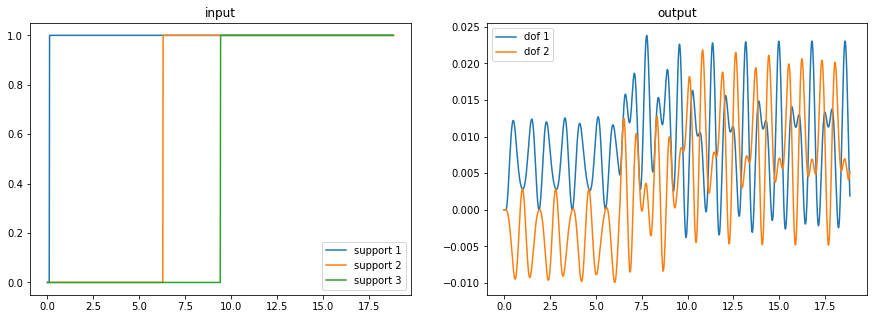

In [2]:
from matplotlib import pyplot as plt
from scipy import integrate
from numpy import pi
tf = 6*pi
dt = 0.01
ns = 3
nf = 2
t = np.linspace(0., tf, 1000)
input = [
    lambda t: float(t > 0.1),
    lambda t: float(t > 2*pi),
    lambda t: float(t > 3*pi)
    # lambda t: np.sin(t),
    # lambda t: np.sin(t),
    # lambda t: np.sin(t-0.1)
]
# input = np.sin(t) + 20*np.random.rand(nt)
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(t, [input[0](ti) for ti in t], t, [input[1](ti) for ti in t], t, [input[2](ti) for ti in t])
ax[0].set_title('input')
ax[0].legend(["support 1", "support 2", "support 3"])
minvk = np.linalg.inv(m)@k
def ex910(y,t,minvk,iota):
    dydt = y
    mipeff = sum(input[i](t)*iota[:,i] for i in range(ns))
    return np.array([
        *y[nf:],
        *(mipeff - minvk@y[:nf])
    ])
output = integrate.odeint(ex910, np.zeros(4), t, args=(minvk,iota))
ax[1].plot(t, output[:,0], t, output[:,1])
ax[1].set_title('output')
ax[1].legend(["dof 1", "dof 2"]);

In [3]:
import scipy
D, V = scipy.linalg.eig(k, m)
print(f"{V=}, \n{D=}")
D, V = np.linalg.eig(minvk)
print(f"{V=}, \n{D=}")
freqs = D**0.5
print(f"{freqs=}")

V=array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]]), 
D=array([ 48.  +0.j, 109.72+0.j])
V=array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]), 
D=array([109.72,  48.  ])
freqs=array([10.4747315 ,  6.92820323])


The fundamental frequencies of the system are **10.47 rad/s** and **6.93 rad/s.**

- [ ] get fundamental frequencies and mode shapes from equation of motion
- [ ] use system identification to determine fundamental frequencies and mode shapes

In [4]:
t[1]

0.018868424345884642

freqs_fft=array([48.8, 50.4, 49.6])


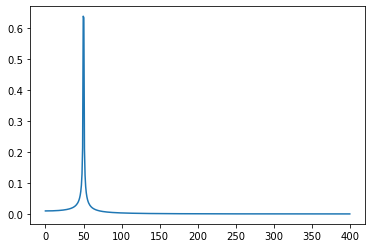

In [5]:
from scipy.fft import fft, fftfreq
N = 1000
# T = t[1]
# T = 0.0189
T = 1.0/800
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0*2.0*pi*x)
xf = fftfreq(N, T)[:N//2]
yf = fft(y)
yff = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yff)
freqs_fft = xf[np.argpartition(yff, -3)[-3:]]
print(f"{freqs_fft=}")

[array([ 1, 21, 31, 32,  0], dtype=int64)]
freqs_fft=array([ 0.8, 16.8, 24.8, 25.6,  0. ])


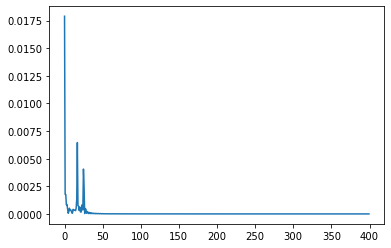

In [6]:
x = t
y = output[:,0]
N = len(x)
# T = x[1]
T = 1/800
xf = fftfreq(N,T)[:N//2]
yf = fft(y)
yff = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yff)
# plt.xlim([0,5])
print([np.argpartition(yff, -5)[-5:]])
freqs_fft = xf[np.argpartition(yff, -5)[-5:]]
print(f"{freqs_fft=}")

In [7]:
print(f"{freqs[1]/freqs[0]=}")
print(f"{freqs_fft[1]/freqs_fft[0]=}")

freqs[1]/freqs[0]=0.6614206034955363
freqs_fft[1]/freqs_fft[0]=21.0


In [8]:
freqs_fft[:2]/freqs/pi

# np.sqrt(2)/2
np.sqrt(3)/2

0.8660254037844386

### Parameterization of inputs and outputs for OKID-ERA and SRIM

I X O -> SS

Class SS
- coeff:  A, B, C, D
- obsv: $\mathcal{O}_{p}$ or $V$ or $V_r$
- ctrl: $\mathcal{C}_{p}$ or $W$ or $W_s$
- shapes: $\Phi, \Psi$
- freq: $\Omega, \Lambda$

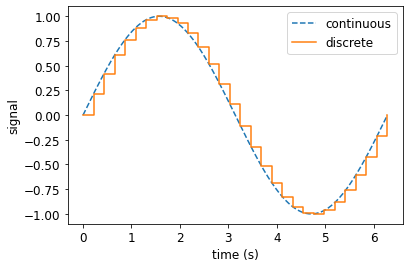

In [9]:
tf = 2*pi
t = np.linspace(0., tf, 1000)
td = np.linspace(0., tf, 30)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(t, np.sin(t), linestyle="--", label="continuous")
ax.step(td, np.sin(td), where='post', label="discrete")
ax.set_xlabel("time (s)", size=12)
ax.set_ylabel("signal", size=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=12);

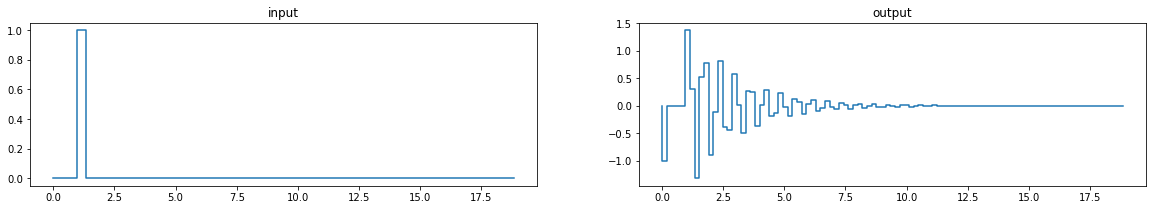

In [10]:
# SDOF example for impulse response and system id

# Timesteps
tf = 6*pi
nt = 100
t = np.linspace(0., tf, nt)
# Impulse input
input = lambda t: float(pi/3-0.1 < t < pi/3+0.1)

# Mass, stiffness, and damping
m = 1
k = 100
w = np.sqrt(k/m)
c = 0.05*2*m*w

fig, ax = plt.subplots(1,2, figsize=(20,3))
# fig, ax = plt.subplots(1,2, figsize=(10,3.5))
ax[0].step(t, [input(ti) for ti in t], where='post')
ax[0].set_title('input')
def eom(y,t,m,c,k):
    return [y[1], -k*y[0]/m-c*y[1]/m-input(t)]
output = integrate.odeint(eom, [1e-5,0], t, args=(m,c,k))
# ax[1].step(t, output[:,0], where='post')
# ax[1].plot(t, output[:,0], where='post')
ax[1].step(t, [-k*output[i,0]/m-c*output[i,1]/m-input(i) for i in range(nt)])
# ax[1].plot(t, [-k*output[i,0]/m-c*output[i,1]/m-input(i) for i in range(nt)])
ax[1].set_title('output');
# ax[1].plot(t+pi/3-0.1, -1*np.sin(w*(t+pi/3-0.1)));

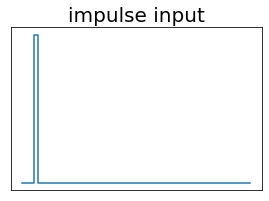

In [11]:
fig, ax = plt.subplots(figsize=(4.5,3))
ax.step(t, [input(ti) for ti in t], where='post')
ax.set_title('impulse input', fontsize=20)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel(r'$t$ (s)', fontsize=20)
ax.set_ylabel(r'$\ddot{u}$ (cm/s$^2$)', fontsize=20);

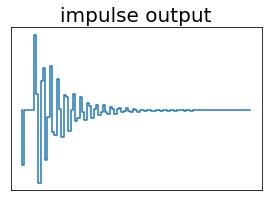

In [12]:
fig, ax = plt.subplots(figsize=(4.5,3))
ax.step(t, [-k*output[i,0]/m-c*output[i,1]/m-input(i) for i in range(nt)])
ax.set_title('impulse output', fontsize=20)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel(r'$t$ (s)', fontsize=20)
ax.set_ylabel(r'$\ddot{u}$ (cm/s$^2$)', fontsize=20);

In [13]:
def husid(accRH, plothusid, dt, lb=0.05, ub=0.95):
    ai = np.tril(np.ones(len(accRH)))@accRH**2
    husid = ai/ai[-1]
    ilb = next(x for x, val in enumerate(husid) if val > lb)
    iub = next(x for x, val in enumerate(husid) if val > ub)
    if plothusid:
        fig, ax = plt.subplots()
        if dt is not None:
            print("duration between ", f"{100*lb}%", " and ", f"{100*ub}%", " (s): ", dt*(iub-ilb))
            ax.plot(dt*np.arange(len(accRH)), husid)
            ax.set_xlabel("time (s)")
        else:
            ax.plot(np.arange(len(accRH)), husid)
            ax.set_xlabel("timestep")
        ax.axhline(husid[ilb], linestyle=":", label=f"{100*lb}%")
        ax.axhline(husid[iub], linestyle="--", label=f"{100*ub}%")
        ax.set_title("Husid Plot")
        ax.legend()
    return (ilb, iub)

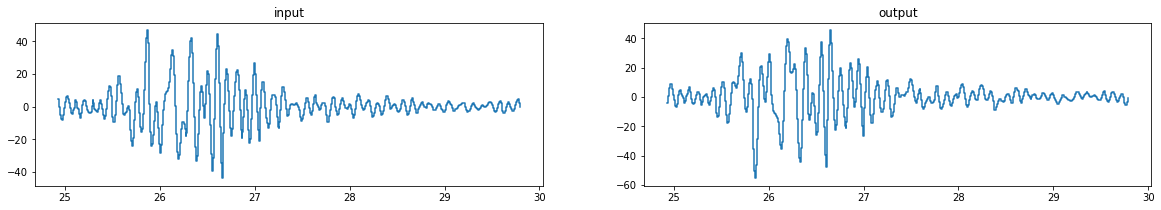

In [14]:
# San Lorenzo Bent 4 south column base input
from pathlib import Path
import quakeio
event_path = Path("./hayward/58658_003_20210628_18.29.26.P_SanLo.zip")
event = quakeio.read(event_path)
channel = event.match("l", station_channel='25')
response = channel.accel.data
wt = husid(response, False, dt, lb=0.01, ub=0.99)
nt = len(response)
dt = 0.01
nf = dt*nt
t = np.arange(0,nf,dt)
input = lambda t: response[int(t/dt)]

# Mass, stiffness, and damping
m = 1
k = 100
w = np.sqrt(k/m)
c = 0.05*2*m*w

# fig, ax = plt.subplots(1,2, figsize=(15,5))
fig, ax = plt.subplots(1,2, figsize=(20,3))
ax[0].step(t[wt[0]:wt[1]], [input(ti) for ti in t][wt[0]:wt[1]], where='post')
ax[0].set_title('input')
def eom(y,t,m,c,k):
    return [y[1], -k*y[0]/m-c*y[1]/m-input(t)]
output = integrate.odeint(eom, [1e-5,0], t, args=(m,c,k))
accel_output = [-k*output[int(ti/dt),0]/m-c*output[int(ti/dt),1]/m-input(ti) for ti in t]
ax[1].step(t[wt[0]:wt[1]], accel_output[wt[0]:wt[1]], where='post')
# markerline, stemlines, baseline = ax[1].stem(t[wt[0]:wt[1]], accel_output[wt[0]:wt[1]], basefmt=' ', linefmt='-', markerfmt=' ')
# plt.setp(stemlines, 'linewidth', 0.5)
ax[1].set_title('output');
# ax[1].plot(t+pi/3, -0.01*np.sin(w*(t+pi/3)));

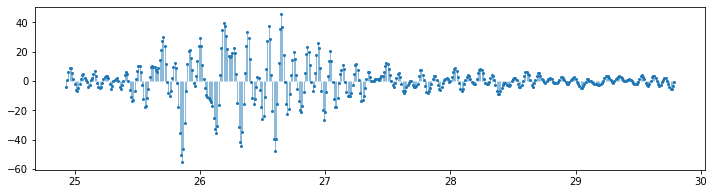

In [15]:
plt.subplots(figsize=(12,3))
markerline, stemlines, baseline = plt.stem(t[wt[0]:wt[1]], accel_output[wt[0]:wt[1]], basefmt=' ')
plt.setp(stemlines, 'linewidth', 0.5)
plt.setp(markerline, 'markersize', 2);

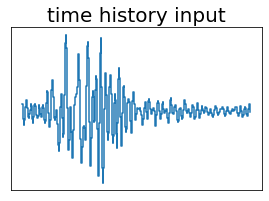

In [16]:
fig, ax = plt.subplots(figsize=(4.5,3))
ax.step(t[wt[0]:wt[1]], [input(ti) for ti in t][wt[0]:wt[1]], where='post')
ax.set_title('time history input', fontsize=20)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel(r'$t$ (s)', fontsize=20)
ax.set_ylabel(r'$\ddot{u}$ (cm/s$^2$)', fontsize=20);

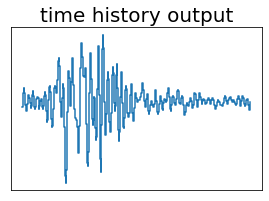

In [17]:
fig, ax = plt.subplots(figsize=(4.5,3))
ax.step(t[wt[0]:wt[1]], accel_output[wt[0]:wt[1]], where='post')
ax.set_title('time history output', fontsize=20)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel(r'$t$ (s)', fontsize=20)
ax.set_ylabel(r'$\ddot{u}$ (cm/s$^2$)', fontsize=20);

# Continuous vs Discrete

$$\dot{x} = A_{c}x$$
$$A_{c} = \Psi \Lambda \Psi^{-1}$$
$$x\left((k+1)\Delta t\right) = A_{d}x(k\Delta t) $$
$$A_{d} = e^{A_{c}\Delta t}$$ 
$$A_{d} = \Psi \Gamma \Psi^{-1} = e^{\Psi \Lambda \Psi^{-1}\Delta t} = {\Psi e^{\Lambda\Delta t}\Psi^{-1}}$$
$$\Gamma = e^{\Lambda\Delta t}$$
$$\lambda_{j} = \frac{\ln{\gamma_{j}}}{\Delta t}$$

In [167]:
import scipy.linalg as sl

dt = 0.01
tf = 10
nt = int(tf/dt)
t = np.arange(0,tf,dt)
assert len(t) == nt

# Mass, stiffness, and damping
m = 1
k = 100
w = np.sqrt(k/m)
c = 0.02*2*m*w
z = c/(2*m*w)

Ac = np.array([[0, 1],[-k/m, -c/m]])
print(f"{Ac=}")
Ad = sl.expm(Ac*dt)
print(f"{Ad=}")

Gam,Psi = sl.eig(Ad)
Lam,Psic = sl.eig(Ac)

print(f"{Psi=}")
print(f"{Psic=}")
print(f"{Gam=}")
print(f"{np.exp(Lam*dt)=}")
print(f"{Lam=}")
print(f"{np.log(Gam)/dt=}")

lams = np.log(Gam)/dt
omegas = np.sqrt(lams*lams.conj())
zetas = -np.real(lams/omegas)
print(f"{omegas=}")
print(f"{zetas=}")
print(f"{w=}")


Ac=array([[   0. ,    1. ],
       [-100. ,   -0.4]])
Ad=array([[ 0.99501082,  0.0099634 ],
       [-0.99634016,  0.99102546]])
Psi=array([[-0.00199007-0.09948382j, -0.00199007+0.09948382j],
       [ 0.99503719+0.j        ,  0.99503719-0.j        ]])
Psic=array([[-0.00199007-0.09948382j, -0.00199007+0.09948382j],
       [ 0.99503719+0.j        ,  0.99503719-0.j        ]])
Gam=array([0.99301814+0.09961409j, 0.99301814-0.09961409j])
np.exp(Lam*dt)=array([0.99301814+0.09961409j, 0.99301814-0.09961409j])
Lam=array([-0.2+9.9979998j, -0.2-9.9979998j])
np.log(Gam)/dt=array([-0.2+9.9979998j, -0.2-9.9979998j])
omegas=array([10.+0.j, 10.+0.j])
zetas=array([0.02, 0.02])
w=10.0


# Trajectories

$$\dot{x} = A_{c}x$$
$$A_{d} = e^{A_{c}\Delta t}$$ 
$$x\left((k+1)\Delta t\right) = A_{d}x(k\Delta t) = e^{A_{c}\Delta t}x(k\Delta t) $$

In [168]:
A1 = np.array([[1,0.1],[-0.1,1]])
A2 = np.array([[0,0.5],[-0.5,0]])
A3 = np.array([[0,1],[-1,-0.5]])

from sympy.matrices import Matrix
display(Matrix(Ac))

Matrix([
[     0,  1.0],
[-100.0, -0.4]])

In [169]:
x0 = np.array([1,0])
xs = np.zeros((2,nt))
xs[:,0] = x0
for i in range(1,nt):
    # xs[:,i] = A3@xs[:,i-1]
    xs[:,i] = Ad@xs[:,i-1]
    # xs[:,i] = xs[:,i-1]+Ac@xs[:,i-1]*dt

$$x_{k+1} = e^{A_{c}\Delta t}x_{k} $$

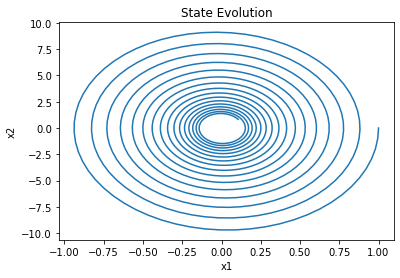

In [170]:
plt.plot(xs[0], xs[1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('State Evolution');

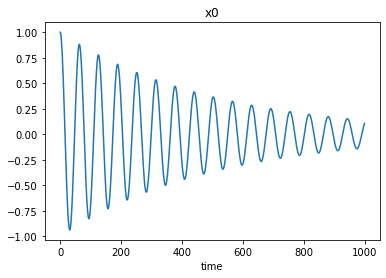

In [171]:
plt.plot(xs[0])
plt.xlabel('time')
plt.title('x0');

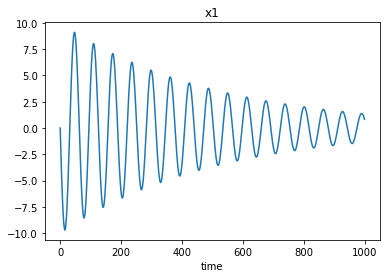

In [172]:
plt.plot(xs[1])
plt.xlabel('time')
plt.title('x1');